## Capstone --- Metadata cleaning


#### Shuaichen Wu

## Introduction

The purpose of this notebook is EDA on metadata and removing descriptions that doesn't meet particular quality requirements.

## Import libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import time
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

First load the metadata dataset to a Dataframe.

In [2]:
metadata =  pd.read_csv('spotify-podcasts-2020/metadata.tsv',sep='\t')

Check the head of the medata dataframe.

In [3]:
metadata.head()

,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,episode_name,episode_description,duration,show_filename_prefix,episode_filename_prefix
0,spotify:show:2NYtxEZyYelR6RMKmjfPLB,Kream in your Koffee,A 20-something blunt female takes on the world...,Katie Houle,['en'],https://anchor.fm/s/11b84b68/podcast/rss,spotify:episode:000A9sRBYdVh66csG2qEdj,1: It’s Christmas Time!,On the first ever episode of Kream in your Kof...,12.700133,show_2NYtxEZyYelR6RMKmjfPLB,000A9sRBYdVh66csG2qEdj
1,spotify:show:15iWCbU7QoO23EndPEO6aN,Morning Cup Of Murder,Ever wonder what murder took place on today in...,Morning Cup Of Murder,['en'],https://anchor.fm/s/b07181c/podcast/rss,spotify:episode:000HP8n3hNIfglT2wSI2cA,The Goleta Postal Facility shootings- January ...,"See something, say something. It’s a mantra ma...",6.019383,show_15iWCbU7QoO23EndPEO6aN,000HP8n3hNIfglT2wSI2cA
2,spotify:show:6vZRgUFTYwbAA79UNCADr4,Inside The 18 : A Podcast for Goalkeepers by G...,Inside the 18 is your source for all things Go...,Inside the 18 GK Media,['en'],https://anchor.fm/s/81a072c/podcast/rss,spotify:episode:001UfOruzkA3Bn1SPjcdfa,Ep.36 - Incorporating a Singular Goalkeeping C...,Today’s episode is a sit down Michael and Omar...,43.616333,show_6vZRgUFTYwbAA79UNCADr4,001UfOruzkA3Bn1SPjcdfa
3,spotify:show:5BvKEjaMSuvUsGROGi2S7s,Arrowhead Live!,Your favorite podcast for everything @Chiefs! ...,Arrowhead Live!,['en-US'],https://anchor.fm/s/917dba4/podcast/rss,spotify:episode:001i89SvIQgDuuyC53hfBm,Episode 1: Arrowhead Live! Debut,Join us as we take a look at all current Chief...,58.189200,show_5BvKEjaMSuvUsGROGi2S7s,001i89SvIQgDuuyC53hfBm
4,spotify:show:7w3h3umpH74veEJcbE6xf4,FBoL,"The comedy podcast about toxic characters, wri...",Emily Edwards,['en'],https://www.fuckboisoflit.com/episodes?format=rss,spotify:episode:0025RWNwe2lnp6HcnfzwzG,"The Lion, The Witch, And The Wardrobe - Ashley...",The modern morality tail of how to stay good f...,51.782050,show_7w3h3umpH74veEJcbE6xf4,0025RWNwe2lnp6HcnfzwzG


Check the shape of the dataframe.

In [4]:
metadata.shape

(105360, 12)

We have 105360 episodes and 12 features.

In [5]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105360 entries, 0 to 105359
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   show_uri                 105360 non-null  object 
 1   show_name                105360 non-null  object 
 2   show_description         105358 non-null  object 
 3   publisher                105360 non-null  object 
 4   language                 105360 non-null  object 
 5   rss_link                 105360 non-null  object 
 6   episode_uri              105360 non-null  object 
 7   episode_name             105360 non-null  object 
 8   episode_description      105155 non-null  object 
 9   duration                 105360 non-null  float64
 10  show_filename_prefix     105360 non-null  object 
 11  episode_filename_prefix  105360 non-null  object 
dtypes: float64(1), object(11)
memory usage: 9.6+ MB


We have 12 columns here.

About the show
0 show_uri: uri is short for uniform resource identifier, spotify uri for the show

1 show_name: name of the show

2 show_description: description of the show

3 publisher: publisher of the show

4 language: language the show is in

5 rss_link: links of show rss feed

10 show_filename_prefix: filename_prefix of the show


About the episode
6 episode_uri: Spotify uri for the episode

7 episode_name: Name of the episode

8 episode_description: Description of the episode

9 duration: duration of the episode in minutes

11 episode_file_name_prefix: filename_prefix of the episode





Now we need to check for null values and duplicated information

In [6]:
metadata.isna().sum()

show_uri                     0
show_name                    0
show_description             2
publisher                    0
language                     0
rss_link                     0
episode_uri                  0
episode_name                 0
episode_description        205
duration                     0
show_filename_prefix         0
episode_filename_prefix      0
dtype: int64

In [7]:
metadata.duplicated().sum()

0

The dataset doesn't have duplicated rows, but we have 205 null values. It is a small number, so we decide to drop it. 

In [8]:
metadata.dropna(inplace=True)

In [9]:
#verify the change we did
metadata.isna().sum().sum()

0

There are two columns in the dataset that could identify a show. One is show_name, and another one is show_uri.
I check if they contain the same information.

In [10]:
metadata.groupby('show_name').size().sort_values(ascending=False)

show_name
Chompers                                                   1071
Dr Berg’s Healthy Keto and Intermittent Fasting Podcast     746
Coach Corey Wayne                                           615
Optimal Living Daily: Personal Development & Minimalism     424
Daily Fortnite                                              417
                                                           ... 
Mindful Mommy and More                                        1
Mindful Mondays by Afro Yoga                                  1
Mindful meditations by Eva Lilleoer                           1
Minding The Gap                                               1
Of Dice and Myths                                             1
Length: 18240, dtype: int64

In [11]:
metadata.groupby('show_uri').size().sort_values(ascending=False)

show_uri
spotify:show:21ASCcEXgUlbFSmoqjroZm    1071
spotify:show:5HT3tYlyW8TJF9KWHQXXtX     746
spotify:show:56CjYLQWyMx1MkOEQmlubi     615
spotify:show:1hygb4nGhNhlLn4pBnN00j     424
spotify:show:4GoSoxDAsPxdQifYr4vv69     417
                                       ... 
spotify:show:3WDgvVRwgwqQxsg6IKEnyJ       1
spotify:show:3WE0GsACUrsGw5z19fkR0Y       1
spotify:show:3WGNSAIvSRaom78pRqImHN       1
spotify:show:3WR3UCfquYMUb0TMJyQelZ       1
spotify:show:7zzrs2gTHKXL8fbtjdLDAE       1
Length: 18326, dtype: int64

In [12]:
metadata.groupby('show_filename_prefix').size().sort_values(ascending=False)

show_filename_prefix
show_21ASCcEXgUlbFSmoqjroZm    1071
show_5HT3tYlyW8TJF9KWHQXXtX     746
show_56CjYLQWyMx1MkOEQmlubi     615
show_1hygb4nGhNhlLn4pBnN00j     424
show_4GoSoxDAsPxdQifYr4vv69     417
                               ... 
show_3WDgvVRwgwqQxsg6IKEnyJ       1
show_3WE0GsACUrsGw5z19fkR0Y       1
show_3WGNSAIvSRaom78pRqImHN       1
show_3WR3UCfquYMUb0TMJyQelZ       1
show_7zzrs2gTHKXL8fbtjdLDAE       1
Length: 18326, dtype: int64

Regarding the URI unique resource identifier, there are more show uris than show names in this dataset. It shows there are some shows that have the same show names.

Show_filename_prefix contains the same information with show uri.

And I know that all the 105360 episodes come from 18,326 shows. 

Since I only need the filename prefix to build file paths for transcripts, now I can safely drop show show_uri.

In [13]:
metadata.drop('show_uri',axis=1,inplace=True)

In [14]:
#check the modification we did
metadata.columns

Index(['show_name', 'show_description', 'publisher', 'language', 'rss_link',
       'episode_uri', 'episode_name', 'episode_description', 'duration',
       'show_filename_prefix', 'episode_filename_prefix'],
      dtype='object')

Now we check the language column distribution.

In [15]:
metadata['language'].unique()

array(["['en']", "['en-US']", "['en-AU']", "['en-CA']", "['en-GB']",
       "['en-NZ']", "['en-IE']", "['ms']", "['en-PH']", "['ta']",
       "['en-ZA']", "['id']", "['nl-BE']", "['ga']", "['en-JM']",
       "['hi']", "['ml']", "['en-IN']", "['es']", "['pt']"], dtype=object)

We find out that our podcasts have a diverse set of languages. Let's check the distribution of episodes by language.

/Users/wuxiaobai/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


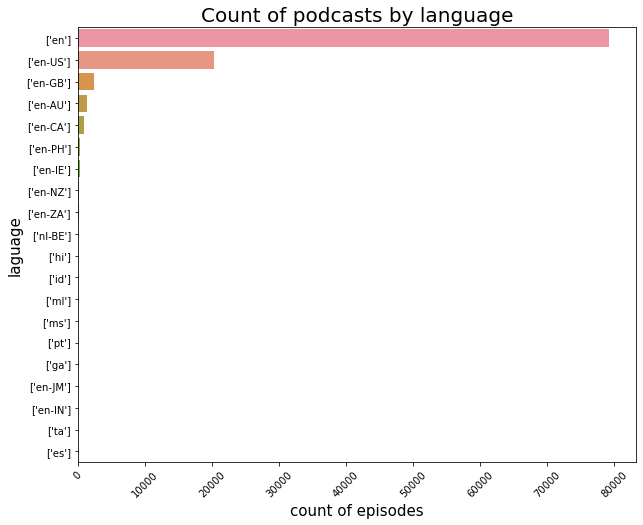

In [16]:
plt.figure(figsize=(10,8))
sns.barplot(metadata['language'].value_counts().values,metadata['language'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('count of episodes',size=15)
plt.ylabel('laguage',size=15);
plt.title('Count of podcasts by language',size=20)
plt.savefig('count of podcasts by language')

We find out that the majority of our podcasts use English. For convenience of analysis, we decide to merge all the english episodes -- for example, 'en', 'en-US', 'en_AU' -- then drop all episodes with non-english language.

In [17]:
metadata['language']=metadata['language'].apply(lambda x:1 if 'en' in x else 0)

In [18]:
#verify the change we did
metadata['language'].value_counts()

1    105025
0       128
Name: language, dtype: int64

In [19]:
#drop the non english episodes
metadata = metadata[metadata['language']==1]

In [20]:
#verify the change we did
metadata['language'].value_counts()

1    105025
Name: language, dtype: int64

Now we can safely drop the language column, since it doesn't offer any information about the dataset.

In [21]:
metadata.drop('language',axis=1,inplace=True)

In [22]:
#verify the drop we did
metadata.head(5)

,show_name,show_description,publisher,rss_link,episode_uri,episode_name,episode_description,duration,show_filename_prefix,episode_filename_prefix
0,Kream in your Koffee,A 20-something blunt female takes on the world...,Katie Houle,https://anchor.fm/s/11b84b68/podcast/rss,spotify:episode:000A9sRBYdVh66csG2qEdj,1: It’s Christmas Time!,On the first ever episode of Kream in your Kof...,12.700133,show_2NYtxEZyYelR6RMKmjfPLB,000A9sRBYdVh66csG2qEdj
1,Morning Cup Of Murder,Ever wonder what murder took place on today in...,Morning Cup Of Murder,https://anchor.fm/s/b07181c/podcast/rss,spotify:episode:000HP8n3hNIfglT2wSI2cA,The Goleta Postal Facility shootings- January ...,"See something, say something. It’s a mantra ma...",6.019383,show_15iWCbU7QoO23EndPEO6aN,000HP8n3hNIfglT2wSI2cA
2,Inside The 18 : A Podcast for Goalkeepers by G...,Inside the 18 is your source for all things Go...,Inside the 18 GK Media,https://anchor.fm/s/81a072c/podcast/rss,spotify:episode:001UfOruzkA3Bn1SPjcdfa,Ep.36 - Incorporating a Singular Goalkeeping C...,Today’s episode is a sit down Michael and Omar...,43.616333,show_6vZRgUFTYwbAA79UNCADr4,001UfOruzkA3Bn1SPjcdfa
3,Arrowhead Live!,Your favorite podcast for everything @Chiefs! ...,Arrowhead Live!,https://anchor.fm/s/917dba4/podcast/rss,spotify:episode:001i89SvIQgDuuyC53hfBm,Episode 1: Arrowhead Live! Debut,Join us as we take a look at all current Chief...,58.189200,show_5BvKEjaMSuvUsGROGi2S7s,001i89SvIQgDuuyC53hfBm
4,FBoL,"The comedy podcast about toxic characters, wri...",Emily Edwards,https://www.fuckboisoflit.com/episodes?format=rss,spotify:episode:0025RWNwe2lnp6HcnfzwzG,"The Lion, The Witch, And The Wardrobe - Ashley...",The modern morality tail of how to stay good f...,51.782050,show_7w3h3umpH74veEJcbE6xf4,0025RWNwe2lnp6HcnfzwzG


Let's check the duration column.

In [23]:
metadata['duration'].describe()

count    105025.000000
mean         33.911146
std          22.715013
min           0.175317
25%          13.650283
50%          31.708400
75%          50.487833
max         304.953900
Name: duration, dtype: float64

/Users/wuxiaobai/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


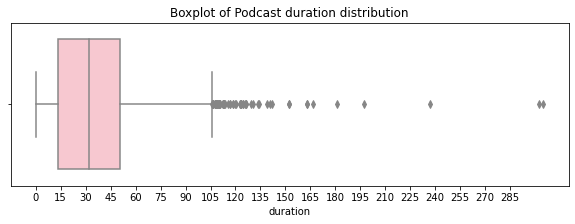

In [24]:
plt.figure(figsize=(10,3))
sns.boxplot(metadata['duration'],color='pink')
plt.xticks(range(0,300,15))
plt.title('Boxplot of Podcast duration distribution')
plt.savefig('Boxplot of podcast duration distribution')

This feature describes episode duration. From the description table, we know the shortest episode could be close to 0.17 minites, which is an unprofessional podcast. To eliminate all unprofessional podcasts we decide to set a threshold.

In [25]:
metadata['duration'].quantile(0.05)

3.1949766666666672

95% podcasts in the dataset are longer than 3 minutes. There are some podcasts that try to fit into people's life and make the duration around 3 to 5 minutes, for example radio headspace: https://www.headspace.com/podcast.

3 minutes is a reasonable cut.

Also, some outliers show after 105 minutes, so we decide to drop outliers too.

In [26]:
metadata=metadata[(metadata['duration']>=3) & (metadata['duration']<=105)]

In [27]:
#verify the change we made
metadata['duration'].describe()

count    100245.000000
mean         35.352103
std          21.989070
min           3.000000
25%          15.794983
50%          33.290883
75%          51.487783
max         104.970883
Name: duration, dtype: float64

There are a few columns that are not needed for our future model building.

'rss_link': contains information I don't need

'episode_uri': shares the same information with 'episode_filename_prefix'

'show_name'

'episode_name'

We decide to drop them.

In [28]:
metadata.drop(['rss_link','episode_uri'],axis=1,inplace=True)

In [29]:
metadata.drop(['show_name','episode_name'],axis=1,inplace=True)

In [30]:
#verify the change we did
metadata.columns

Index(['show_description', 'publisher', 'episode_description', 'duration',
       'show_filename_prefix', 'episode_filename_prefix'],
      dtype='object')

In [31]:
#check the number of episodes now.
metadata['episode_filename_prefix'].nunique() 

100245

In [32]:
##check the number of shows now.
metadata['show_filename_prefix'].nunique() 

17498

Now we have 17,498 shows and 100,245 episodes left.

Every episode_filename maps to an episode. The file name is what we need to map back to the transcript, so we can keep both for tracking convience.

## Text cleaning on show description and episode description
I need both information from show description and episode description. I need do some text cleaning on them.

In [33]:
#take a look at first 5 show description
for i in metadata['show_description'][:5]:
    print(i)
    print()

A 20-something blunt female takes on the world and gives you her take on it. Enjoy visits from special guests and friends to give insight and input into interesting situations.

Ever wonder what murder took place on today in true crime history? If so, sit back and grab a cup of coffee as you enjoy your daily dose of TC goodness. Your host, Korina Biemesderfer, guides you through history with tales of murder, abduction, serial killers, crimes of passion, cults and more in this short form daily true crime podcast. Support this podcast: https://anchor.fm/morning-cup-of-murder/support

Inside the 18 is your source for all things Goalkeeping! Each week we are joined by guests from around the world. We recap the weeks events, discuss new training techniques and have candid conversations with professional goalkeepers and goalkeeper coaches. The show is a must listen for the goalkeeping enthusiast!    #insidethe18 #goalkeeperpodcast #thegoalkeepers #goalkicks #ederson #NWSL #ashlynharris #UWSN

In [34]:
#take a look at first 5 episode description
for i in metadata['episode_description'][:5]:
    print(i)
    print()

On the first ever episode of Kream in your Koffee, Katie talks about tips for Christmas shopping. We also get a little insight into who and what we’ll be hearing about in next weeks episode! 

See something, say something. It’s a mantra many live by. If you see something strange, call it in or make someone aware, even if it seems innocuous. Jennifer San Marco had strange behaviors. It was clear to many that the woman suffered from mental illness that was being untreated. But, many wrote it off. And, on January 30th 2006 her strange behaviors bubbled over and the Goleta Postal Facility shootings began. Jennifer San Marco Kills (2006) Become a supporter of this podcast on Patreon: https://www.patreon.com/morningcupofmurder Follow Morning Cup of Murder on Twitter: https://twitter.com/cupofmurder @cupofmurder Follow MCOM on Instagram: @morningcupofmurder Have a Murder or strange true crime story you want to share, email the show here: morningcupofmurder@gmail.com Morning Cup of Murder is r

After observation, I found there are the following items that need to be removed:

1. links

2. @ tags

3. The information associated with anchor, twitter, and sponsors

In [35]:
import re
import emoji
def text_cleaner(text):
    text = text.lower()
    text = re.sub(r'[\sa-z:]*https://[a-z./-]*', ' ', text) # get rid of links and the information before the link
    text = re.sub(r'[1-9\sa-z:]*\.com', ' ', text) # get rid of links and information beore the link
    text = re.sub(r'[1-9\sa-z:]*\.fm', ' ', text) # get rid of links and information beore the link
    text = re.sub(r'@[a-z_]*', ' ', text) #get rid of @ and contact name
    
    text = re.sub(r'this episode is sponsored by.*', ' ', text) #get rid of sponsor information
    text = re.sub(r'anchor:[a-z\s]*', '',text) #get rid of anchor information
    text = re.sub(r'support this podcst:[a-z\s]*', '',text) #get rid of anchor information
    
    text = re.sub(r'\xa0', ' ', text) #get rid of some special characters
    text = re.sub(r'[()]', ' ', text) #get rid of "(,)"
    text = re.sub(r'--+', ' ', text) #get rid of more than one '-'
    text = re.sub(r'\s\s+', ' ', text) # get rid more than one space
    
    text = emoji.demojize(text, delimiters=("", "")) # get rid of emojis
    
    text = re.sub(r'\s[.]\s','',text) # get rid of single dot
    
    text = text.strip() #get rid of the space in the end of sentences.
    return text

Now we need apply text cleaner on both show descriptions and episode descriptions.

In [36]:
#apply text cleaner on show description
metadata['show_description']=metadata['show_description'].apply(text_cleaner)

In [37]:
#apply text cleaner on episode description
metadata['episode_description']=metadata['episode_description'].apply(text_cleaner)

In [38]:
#Since we did text cleaning, There are some episodes lost show descriptions and episode descriptions.
#Take a look
no_show_description = metadata[metadata['show_description'].apply(lambda x:len(x.split())) == 0]
no_show_description

,show_description,publisher,episode_description,duration,show_filename_prefix,episode_filename_prefix
361,,Ben Mills,our first episode! grant and ben discuss annoy...,27.570933,show_1DWNcJ7Y3O2nwOMQtJe4NC,01a4hlkwaRhFJB9WsLls31
436,,katrine m,solo album release review,3.883533,show_17EmhNBWNZxZmH7Aq4E4g7,01xZkV7SRuzWcyd44LdMaK
443,,Sean Miller,the very first episode of the keg friday podcast,24.066317,show_3SJu6gH68ch93wwT8MkI0j,01zN1mocXc2iBmAeNmxYqQ
481,,Christina Sutra,a channeled message,5.310783,show_7mFneSlq4LDRJtYAZVKY66,027pQ7U9Tmj7lSowNL3EsH
748,,Andrew Sorrells,college basketball player rode a freight train...,50.255233,show_1kUF9QwqIt4vjin3CPuP5a,03OV3RDcVDFpem6cbkmRWt
...,...,...,...,...,...,...
104829,,Michigan Bros. Grow Show,in this episode we sat down with the babes and...,38.531200,show_5tWTxszjpFxOV2E9Bz1jyN,7xZZjqFVp6ALtzB5QRPOaZ
104943,,Brandon Epstein,free 7 day meditation challenge: http://bit.ly...,13.448400,show_544gZVaYCBhLMjxXFGf3SM,7y8u1kPyJg4UC61VIFqid9
104999,,Jayson with a Y,"in part 1 of this 3 part series on ""a world wi...",12.844500,show_2xhy7fZFZKh3sJqzogDM83,7yNaivEYvIrOWTf2wSSPGQ
105098,,Goop squad,go time,59.285967,show_0oJNR4qs6v1yOBgjIf7Sq2,7yrJwwRC5aLBx1v0W5XQly


There are 505 episodes without show descriptions. I need the information of the show description for model training and evaluation, so I drop all the episodes that have no show_description.

In [39]:
#drop podcasts episodes without show description
metadata = metadata.drop(no_show_description.index,axis=0)

In [40]:
#verify the change we did
metadata[metadata['show_description'].apply(lambda x:len(x.split())) == 0]

,show_description,publisher,episode_description,duration,show_filename_prefix,episode_filename_prefix


There is no data in the above data frame, which means we droped all the episodes without show descriptions.

In [41]:
#Now check podcast episodes without episode description.
no_episode_description = metadata[metadata['episode_description'].apply(lambda x:len(x.split())) == 0]
no_episode_description

,show_description,publisher,episode_description,duration,show_filename_prefix,episode_filename_prefix
272,a daily podcast that helps you raise your vibr...,A Higher Flying Disc,,15.758617,show_2uLBfGb9Q8Rfp2ZFZeACQh,01D1VleYxGICa1jwVHRXym
275,"welcome to stadia cast, your one stop shop for...",StadiaCast,,57.160567,show_6OUmYXPo78opQFutV9UHX8,01DiMn0u8U8qEhby6L8lhd
415,what are the secrets behind some of the most s...,Rebecca Minkoff,,21.682067,show_1O6UL6L2KTgIgMuH9LdxTY,01rBLipOBG6O0GJv0q9gtP
1021,welcome to the podcast of campus rush led by p...,Pastor Kofi Dartey,,55.892467,show_1fBKgDfcgTx7Xsov0qzGF2,04geSOJUFBRVpzeSF3U9np
1122,a podcast to share my love of learning languag...,Azren The Language Nerd,,20.952533,show_2KqaP5uKhR6oTYsRKIX7gS,05CCufGYgKYpm542DZcfO0
...,...,...,...,...,...,...
104515,"want to improve you english pronunciation, spe...",English Speaking Secrets,,7.978767,show_0e2tMqHNabAf1lJUF2Nakg,7w2ZXj3X4fSujTUcaPKTSm
104927,i'm katy and i'm an artist that struggled so m...,Katy Arrington,,21.427767,show_6Mqs5y0FeaFMuZK0cf7g2x,7y5E1QDxn4rdnztSCCIZJW
105031,"want to improve you english pronunciation, spe...",English Speaking Secrets,,10.775600,show_0e2tMqHNabAf1lJUF2Nakg,7yXUO8zUbjqGdfjQGFtwdr
105135,dedicated to horse lovers around the globe! br...,Jenna Smeenk,,33.682133,show_6yqAyZYRW9laXRDadzwLgN,7z2kEwYLfjq2rv4EazgZpC


There are 336 episodes without episode descriptions after text cleaning. These need to be dropped.

In [42]:
metadata = metadata.drop(no_episode_description.index,axis=0)

In [43]:
#verify the change we did 
metadata[metadata['show_description'].apply(lambda x:len(x.split())) == 0]

,show_description,publisher,episode_description,duration,show_filename_prefix,episode_filename_prefix


There is no data show above, which means all episodes without descriptions were removed.

## Check the length of show descriptions

In [44]:
#Since one show only have one description, use group by to get one description for each show
show_description_len = metadata.groupby('show_filename_prefix')['show_description'].max().apply(lambda x:len(x.split()) )

In [45]:
#Check the distribution of transcripts length.
show_description_len.describe()

count    17329.000000
mean        38.299556
std         27.468558
min          1.000000
25%         17.000000
50%         31.000000
75%         55.000000
max        542.000000
Name: show_description, dtype: float64

Text(0, 0.5, 'number of shows')

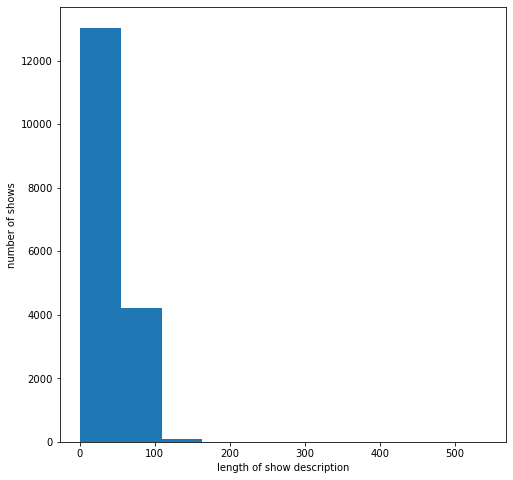

In [46]:
#visualize the length disribution
plt.figure(figsize=(8,8))
plt.hist(show_description_len)
plt.xlabel('length of show description')
plt.ylabel('number of shows')

For show descriptions, the average length is 31 words. 75% of show descriptions have less than 55 words. Also from the diagram above, I know the majority of show descriptions are less than 100 words.

## Check the length of episode descriptions

In [47]:
episode_description_len = metadata['episode_description'].apply(lambda x:len(x.split()) )

In [48]:
#Check the distribution of transcripts length.
episode_description_len.describe()

count    99404.000000
mean        74.422126
std         72.946285
min          1.000000
25%         26.000000
50%         52.000000
75%         97.000000
max        748.000000
Name: episode_description, dtype: float64

Text(0, 0.5, 'number of episodes')

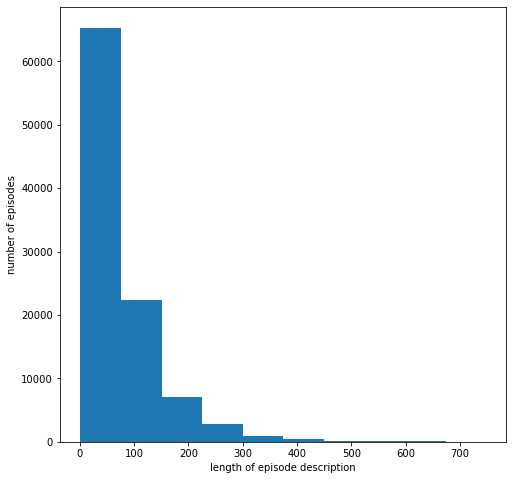

In [49]:
#visualize the length disribution
plt.figure(figsize=(8,8))
plt.hist(episode_description_len)
plt.xlabel('length of episode description')
plt.ylabel('number of episodes')

For episode descriptions, the average length is 52 words. 75% of episode descriptions are less than 97 words. From the diagram above, I know the majority of episode descriptions are less than 150 words. 

### Criteria for length 

In the TREC paper[1] that describes the information about the dataset, the length criteria is mentioned.

For episode descriptions, the professional length should be between 20 to 750 words. Any description that is beyond or less than that is less descriptive.

In [50]:
#create new column that describe the length of descriptions
metadata['episode_description_len'] = metadata['episode_description'].apply(lambda x:len(x.split()) )

In [51]:
#filter the length of episode description

In [52]:
filter_ = (metadata['episode_description_len']>=20) & (metadata['episode_description_len']<=750)
metadata[~filter_].shape

(17359, 7)

In [53]:
metadata = metadata[filter_]

We filter out 17,359 episodes.

In [54]:
# now I can drop the episode description len column
metadata.drop('episode_description_len',axis=1,inplace=True)

## Criteria for similarity to other descriptions

If similarity with other episode description are more than 50%, it means it is less descriptive.

In [55]:
metadata.reset_index(drop=True,inplace=True)

In [56]:
metadata.head()

,show_description,publisher,episode_description,duration,show_filename_prefix,episode_filename_prefix
0,a 20-something blunt female takes on the world...,Katie Houle,on the first ever episode of kream in your kof...,12.700133,show_2NYtxEZyYelR6RMKmjfPLB,000A9sRBYdVh66csG2qEdj
1,ever wonder what murder took place on today in...,Morning Cup Of Murder,"see something, say something. it’s a mantra ma...",6.019383,show_15iWCbU7QoO23EndPEO6aN,000HP8n3hNIfglT2wSI2cA
2,inside the 18 is your source for all things go...,Inside the 18 GK Media,today’s episode is a sit down michael and omar...,43.616333,show_6vZRgUFTYwbAA79UNCADr4,001UfOruzkA3Bn1SPjcdfa
3,your favorite podcast for everything ! providi...,Arrowhead Live!,join us as we take a look at all current chief...,58.189200,show_5BvKEjaMSuvUsGROGi2S7s,001i89SvIQgDuuyC53hfBm
4,"the comedy podcast about toxic characters, wri...",Emily Edwards,the modern morality tail of how to stay good f...,51.782050,show_7w3h3umpH74veEJcbE6xf4,0025RWNwe2lnp6HcnfzwzG


In [57]:
show_des=metadata['show_description']
episode_des=metadata['episode_description']

We use TF-IDF vectorizer on the two features separately and combine them together to a similarity matrix.

TF-IDF is short for term frequency inverse document frequency, which is a statistic describe how important a term is for a corpus.

In [59]:
#I initiate TF-IDF vectorizer with stopwords, max_feature, and min_df.

#initiate Tf_IDF vectorizer
#show descriptions are put in sparse matrix
show_vec = TfidfVectorizer(stop_words='english',min_df=2,max_features=1000)
show_vec.fit(show_des)
show_df = show_vec.transform(show_des)

In [60]:
show_df.shape

(82045, 1000)

In [61]:
#episode descriptions are put in sparse matrix
episode_vec = TfidfVectorizer(stop_words='english',min_df=2,max_features=1000)
episode_vec.fit(episode_des)
episode_df = episode_vec.transform(episode_des)

In [62]:
episode_df.shape

(82045, 1000)

In [63]:
#bring back together for show description
show_transformed=pd.DataFrame(data=show_df.toarray(),columns=show_vec.get_feature_names())

In [64]:
#bring back together for episode description
episode_transformed = pd.DataFrame(data=episode_df.toarray(),columns=episode_vec.get_feature_names())

In [65]:
# check the similarity between episodes


cosine_similarity(np.array([episode_transformed.loc[1].to_numpy()]),np.array([episode_transformed.loc[989].to_numpy()]))

array([[0.03572306]])

This shows that index 1 episode description and index 989 episode desription have 3% overlapping information.

Besides similarity between two random episodes, now I can compute pairwise similarity between episode descriptions.

In [68]:
#use dense output equal false could hugely decrease the run time and computation memory
start=time.time()
similarities = cosine_similarity(episode_df,dense_output=False)
end=time.time()
print(f'to output the duration of pairwise similarity cost {end -start}')

to output the duration of pairwise similarity cost 184.37505984306335


In [69]:
similarities.shape

(82045, 82045)

In [12]:
#the following code will cause the kernel to die. I believe the reason is costing too much computational memory
#similarities.toarray()

The similarities sparse matrix takes over 58GB memory. Without enough computation power, the kernel kept shutting down if I try to transfer similarities to a dense matrix. I decide to split the dense matrix into 8 chunks, every chunk has 10,000 or more episodes descriptions and their similarity to all other episode descriptions.

In [4]:
#First Chunk 
similarity_0_10000=np.array(similarities[0:10000,:].todense()).squeeze()

In [4]:
similarity_0_10000.shape

(10000, 82045)

In [32]:
#get the episode description that overlaps with only themselves
descriptive_index=[]
for i in range(10000):
    similar_filter = (similarity_0_10000[i]>0.5) 
    if len(similarity_0_10000[i][similar_filter])<=1: #exclude the one that only has high similarity with itself
        descriptive_index.append(i)

Check for the first 10,000 episode descriptions, the indices of too much similarity with other episode descriptions.

In [33]:
len(descriptive_index)

3946

For the first 100,000 episode descriptions, there are 6054 episode descriptions that have overlap of more than 50% informaiton with others. Only 3946 episodes descriptions left.

 Let's do the same thing to the next 100,000 episode descriptions.

In [4]:
chunk = 10000 # use chunk to represent the length

In [5]:
#Second chunk
similarity_10000_20000=np.array(similarities[chunk:chunk*2].todense()).squeeze()

In [16]:
similarity_10000_20000.shape

(10000, 82045)

In [34]:
#for second chunk, get the episodes descriptions that are only similar to themselves
for i in range(10000):
    similar_filter = (similarity_10000_20000[i]>0.5) 
    if len(similarity_10000_20000[i][similar_filter])<=1:
        descriptive_index.append(i+chunk)

In [35]:
len(descriptive_index)

7884

Now I have 7884 episode descriptions.

In [ ]:
#Third chunk
similarity_20000_30000=np.array(similarities[chunk*2:chunk*3].todense()).squeeze()

In [36]:
for i in range(10000):
    similar_filter = (similarity_20000_30000[i]>0.5) 
    if len(similarity_20000_30000[i][similar_filter])<=1:
        descriptive_index.append(i+chunk*2)

In [37]:
len(descriptive_index)

11846

Now I have 11846 episode descriptions.

In [8]:
#Fourth chunk
similarity_30000_40000=np.array(similarities[chunk*3:chunk*4].todense()).squeeze()

In [38]:
for i in range(10000):
    similar_filter = (similarity_30000_40000[i]>0.5) 
    if len(similarity_30000_40000[i][similar_filter])<=1:
        descriptive_index.append(i+chunk*3)

In [39]:
len(descriptive_index)

15796

Now I have 15796 episode descriptions.

In [9]:
#Fifth chunk
similarity_40000_50000=np.array(similarities[chunk*4:chunk*5].todense()).squeeze()

In [40]:
for i in range(10000):
    similar_filter = (similarity_40000_50000[i]>0.5) 
    if len(similarity_40000_50000[i][similar_filter])<=1:
        descriptive_index.append(i+chunk*4)

In [41]:
len(descriptive_index)

19869

Now I have 19869 episode descriptions.

In [5]:
#Sixth chunk
similarity_50000_60000=np.array(similarities[chunk*5:chunk*6].todense()).squeeze()

In [9]:
for i in range(10000):
    similar_filter = (similarity_50000_60000[i]>0.5) 
    if len(similarity_50000_60000[i][similar_filter])<=1:
        descriptive_index.append(i+chunk*5)

In [10]:
len(descriptive_index)

23842

Now I have 23842 episode descriptions.

In [12]:
#Seventh chunk
similarity_60000_70000=np.array(similarities[chunk*6:chunk*7].todense()).squeeze()

In [14]:
for i in range(10000):
    similar_filter = (similarity_60000_70000[i]>0.5) 
    if len(similarity_60000_70000[i][similar_filter])<=1:
        descriptive_index.append(i+chunk*6)

In [15]:
len(descriptive_index)

27853

Now I have 27853 episode descriptions.

In [10]:
descriptive_index=joblib.load('des_index_checkpoint1-7.pkl')

In [5]:
#The last chunk
similarity_70000_=np.array(similarities[chunk*7:].todense()).squeeze()

In [8]:
#The last chunk length
final_chunk = similarity_70000_.shape[0]
final_chunk

12045

The last chunk has 12,045 episode transcriptions

In [11]:
for i in range(final_chunk):
    similar_filter = (similarity_70000_[i]>0.5) 
    if len(similarity_70000_[i][similar_filter])<=1:
        descriptive_index.append(i+chunk*7)

In [12]:
len(descriptive_index)

32627

Now I have total 32,627 episodes left.

In [18]:
#Now I need put the indexes collected back into metadata dataframe
metadata = metadata.iloc[descriptive_index]

### Criteria for similarity to show description

From the paper[1], episode descriptions that have high similarity with their show description (over 40%) are less descriptive.

In [23]:
metadata=metadata.reset_index(drop=True)

In [28]:
show_des=metadata['show_description']
episode_des=metadata['episode_description']

In [31]:
#initiate Tf_IDF vectorizer
#show descriptions are put in sparse matrix
show_vec = TfidfVectorizer(stop_words='english',min_df=2,max_features=2000)
show_vec.fit(show_des)
show_df = show_vec.transform(show_des)

In [32]:
show_df.shape

(32627, 2000)

In [33]:
#episode descriptions are put in sparse matrix
episode_vec = TfidfVectorizer(stop_words='english',min_df=2,max_features=2000)
episode_vec.fit(episode_des)
episode_df = episode_vec.transform(episode_des)

In [34]:
episode_df.shape

(32627, 2000)

In [35]:
#get the similarity between episode description and show description
similarities_between = cosine_similarity(episode_df,show_df,dense_output=False)

In [52]:
sb_l=similarities_between.shape[0]

In [53]:
descriptive_index2=[]
for i in range(sb_l):
    if similarities_between[i,i]<0.4:
        descriptive_index2.append(i)       

In [54]:
len(descriptive_index2)

32627

All episode descriptions left are not overlapping with the show descriptions. I got the metadata I need. Now I need to load the transcripts from the json files.

In [55]:
#joblib.dump(metadata,'metadata.pkl')

['metadata.pkl']

## Conclusion

In this notebook, I did data cleaning and EDA on the metadata. 

I cleaned the text for episode descriptions and show descriptions.

I checked the length of episode descriptions.

I removed descriptions of small length, as was done in TREC 2020.

Reference
[1][100,000 Podcasts: A Spoken English Document Corpus](https://aclanthology.org/2020.coling-main.519) (Clifton et al., COLING 2020)